# World Education | EDA
___


In [1]:
# libraries for data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# libraries for visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import seaborn as sns
import scienceplots


In [2]:
# setting up color schemes and themes

plt.style.use(['science', 'notebook', 'grid'])

#bodacious colors
colors_1 = sns.color_palette("rocket",6)
colors_2 = sns.color_palette("crest",6)

#Ram's colors, if desired
seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

In [3]:
# Importing the Data

data = pd.read_csv('../data/raw/Global_Education.csv', encoding='latin-1')
data.sample(10)

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
169,Sri Lanka,7.873054,80.771797,0,0,2,3,0,0,18,...,0,0,0,0,99,99,15.83,100.2,19.6,4.20
130,Nigeria,9.081999,8.675277,0,0,0,0,0,0,0,...,0,0,0,0,82,68,37.91,84.7,10.2,8.10
106,Malawi,13.254308,34.301525,0,0,0,0,19,18,62,...,0,0,0,0,0,0,34.12,142.5,0.8,5.65
38,Colombia,4.570868,74.297333,3,1,3,2,6,5,22,...,55,48,50,35,99,99,14.88,114.5,55.3,9.71
148,Russia,61.524010,105.318756,9,10,1,0,2,1,3,...,99,89,78,78,100,100,11.50,102.6,81.9,4.59
51,Djibouti,11.825138,42.590275,85,88,32,35,48,48,66,...,0,0,0,0,0,0,21.47,75.3,5.3,10.30
23,Botswana,22.328474,24.684866,79,78,12,10,0,0,0,...,0,16,0,0,0,0,24.82,103.2,24.9,18.19
196,Vanuatu,15.376706,166.959158,38,38,8,7,2,4,41,...,0,0,0,0,96,97,29.60,109.3,4.7,4.39
120,Morocco,31.791702,7.092620,31,39,2,3,8,11,26,...,0,0,27,14,98,97,18.94,113.9,35.9,9.02
7,Argentina,38.416097,63.616672,2,2,0,0,0,0,15,...,46,56,48,31,99,100,17.02,109.7,90.0,9.79


In [4]:
print("checking null values and basic stats for the data\n")
data.drop(columns=['Latitude ', 'Longitude']).info()
print('---'*20)
data.drop(columns=['Latitude ', 'Longitude']).describe().T

checking null values and basic stats for the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 2   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 3   OOSR_Primary_Age_Male                    202 non-null    int64  
 4   OOSR_Primary_Age_Female                  202 non-null    int64  
 5   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 6   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 7   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Upper_Secondary_Age_Female          202 non-null    int64  
 9   Completion_Rate_Primary_Male             202 non-null    int64  
 10 

,count,mean,std,min,25%,50%,75%,max
OOSR_Pre0Primary_Age_Male,202.0,19.658416,25.007604,0.0,0.0000,9.000,31.0000,96.00
OOSR_Pre0Primary_Age_Female,202.0,19.282178,25.171147,0.0,0.0000,7.000,30.0000,96.00
OOSR_Primary_Age_Male,202.0,5.282178,9.396442,0.0,0.0000,1.000,6.0000,58.00
OOSR_Primary_Age_Female,202.0,5.569307,10.383092,0.0,0.0000,1.000,6.7500,67.00
OOSR_Lower_Secondary_Age_Male,202.0,8.707921,13.258203,0.0,0.0000,2.000,12.7500,61.00
OOSR_Lower_Secondary_Age_Female,202.0,8.831683,14.724717,0.0,0.0000,2.000,10.7500,70.00
OOSR_Upper_Secondary_Age_Male,202.0,20.292079,21.485592,0.0,0.2500,15.000,32.7500,84.00
OOSR_Upper_Secondary_Age_Female,202.0,19.975248,23.140376,0.0,0.2500,12.000,30.0000,89.00
Completion_Rate_Primary_Male,202.0,41.722772,42.162708,0.0,0.0000,37.500,87.5000,100.00
Completion_Rate_Primary_Female,202.0,42.128713,43.099714,0.0,0.0000,33.000,92.0000,100.00


### Jobs to Be Done
**JTBD 1:**

Situation: When I am evaluating the overall performance of education systems across countries,

Motivation: I want to compare key education indicators such as completion rates and literacy rates across regions,

Outcome: so I can identify which regions are lagging behind and require targeted policy attention.

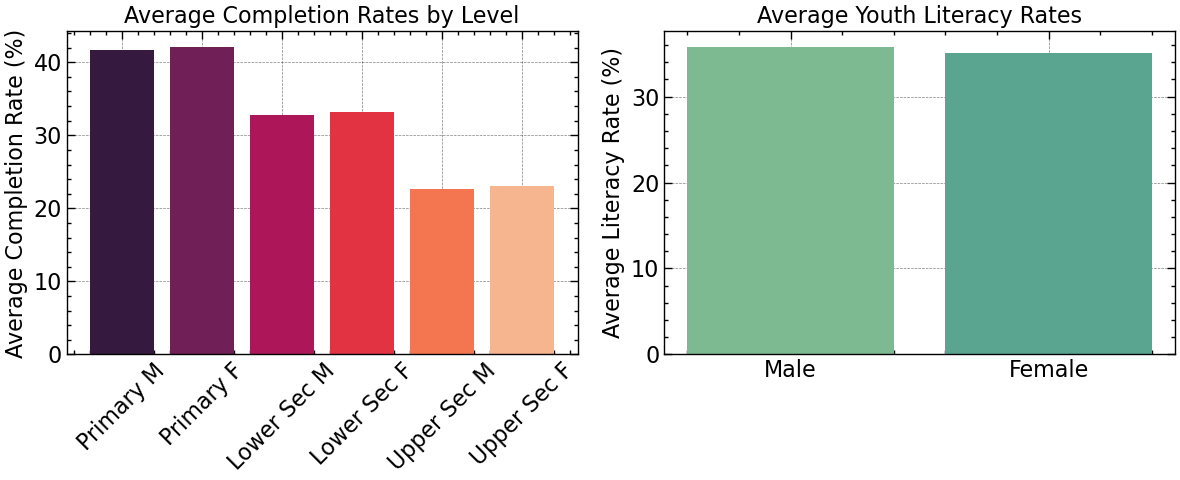

In [5]:
# comparing completion rates and literacy rates
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# plot 1: average completion rates
completion_cols = ['Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
                   'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female',
                   'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female']
completion_means = data[completion_cols].mean()
axes[0].bar(range(len(completion_means)), completion_means, color=colors_1)
axes[0].set_xticks(range(len(completion_means)))
axes[0].set_xticklabels(['Primary M', 'Primary F', 'Lower Sec M', 'Lower Sec F', 'Upper Sec M', 'Upper Sec F'], rotation=45)
axes[0].set_ylabel('Average Completion Rate (%)')
axes[0].set_title('Average Completion Rates by Level')

# plot 2: average literacy rates
literacy_cols = ['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']
literacy_means = data[literacy_cols].mean()
axes[1].bar(range(len(literacy_means)), literacy_means, color=colors_2)
axes[1].set_xticks(range(len(literacy_means)))
axes[1].set_xticklabels(['Male', 'Female'])
axes[1].set_ylabel('Average Literacy Rate (%)')
axes[1].set_title('Average Youth Literacy Rates')

plt.tight_layout()
plt.show()

The bar charts reveal critical patterns in global education performance across levels and genders. Completion rates show a progressive decline from primary (~41-42%) to upper secondary (~22-23%), indicating significant student attrition as education levels advance. Gender parity is largely maintained within each education level, with minimal differences between male and female completion rates. Youth literacy rates remain high and gender-balanced (~35-36%), suggesting foundational literacy skills are being achieved despite lower completion rates at higher education levels. These findings highlight that while access to basic education is relatively equitable, retention through secondary education remains a major challenge requiring targeted interventions to reduce dropout rates.

**JTBD 2:** 

Situation: When designing policies to bridge gender inequality in education,

Motivation: I want to compare different education variables separately for male and female students across different education levels

Outcome: so I can identify gender-based disparities and design policies that promote equal access to education.

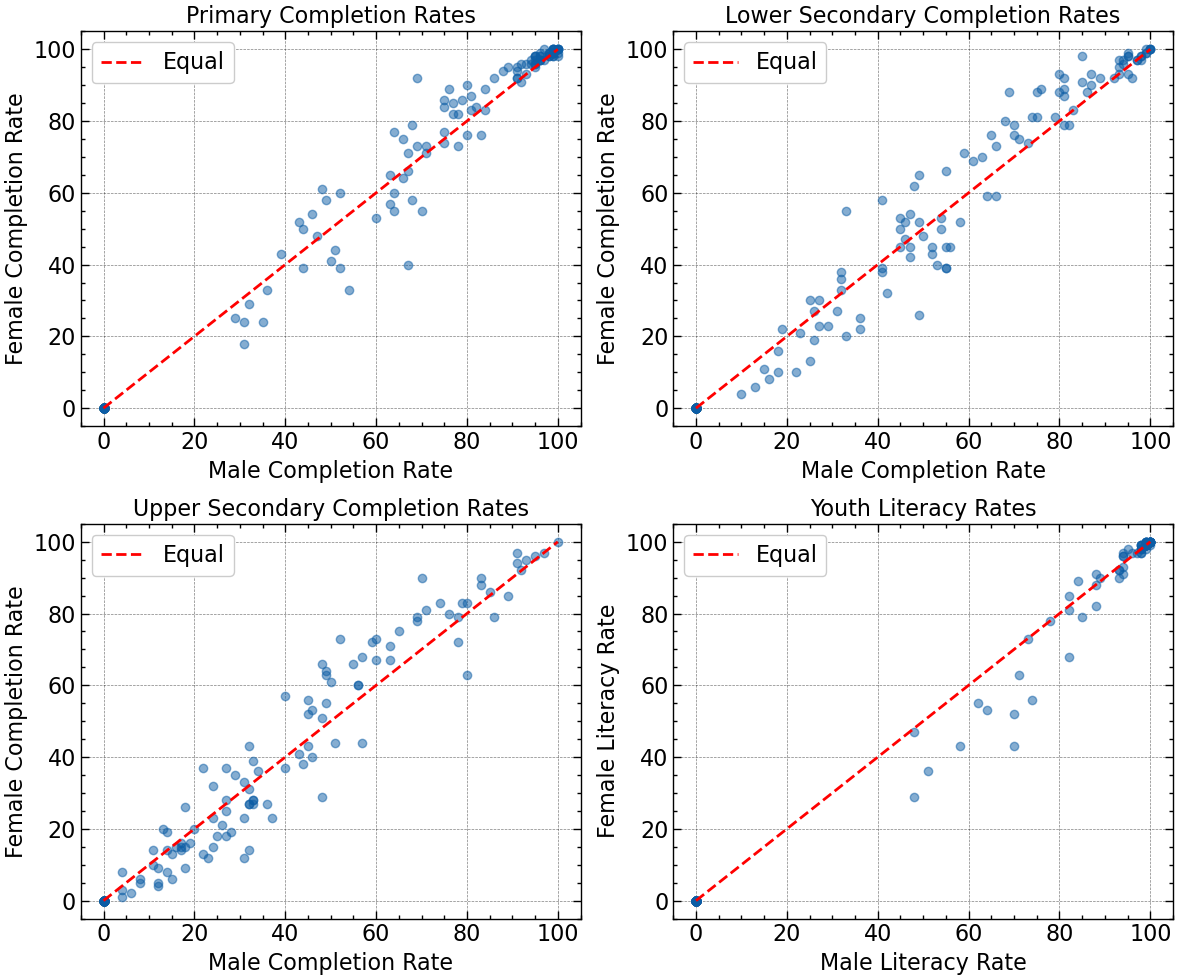

In [6]:
# comparing male vs female education indicators
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: completion rates primary
axes[0, 0].scatter(data['Completion_Rate_Primary_Male'], data['Completion_Rate_Primary_Female'], alpha=0.5)
axes[0, 0].plot([0, 100], [0, 100], 'r--', label='Equal')
axes[0, 0].set_xlabel('Male Completion Rate')
axes[0, 0].set_ylabel('Female Completion Rate')
axes[0, 0].set_title('Primary Completion Rates')
axes[0, 0].legend()

# plot 2: completion rates lower secondary
axes[0, 1].scatter(data['Completion_Rate_Lower_Secondary_Male'], data['Completion_Rate_Lower_Secondary_Female'], alpha=0.5)
axes[0, 1].plot([0, 100], [0, 100], 'r--', label='Equal')
axes[0, 1].set_xlabel('Male Completion Rate')
axes[0, 1].set_ylabel('Female Completion Rate')
axes[0, 1].set_title('Lower Secondary Completion Rates')
axes[0, 1].legend()

# plot 3: completion rates upper secondary
axes[1, 0].scatter(data['Completion_Rate_Upper_Secondary_Male'], data['Completion_Rate_Upper_Secondary_Female'], alpha=0.5)
axes[1, 0].plot([0, 100], [0, 100], 'r--', label='Equal')
axes[1, 0].set_xlabel('Male Completion Rate')
axes[1, 0].set_ylabel('Female Completion Rate')
axes[1, 0].set_title('Upper Secondary Completion Rates')
axes[1, 0].legend()

# plot 4: literacy rates
axes[1, 1].scatter(data['Youth_15_24_Literacy_Rate_Male'], data['Youth_15_24_Literacy_Rate_Female'], alpha=0.5)
axes[1, 1].plot([0, 100], [0, 100], 'r--', label='Equal')
axes[1, 1].set_xlabel('Male Literacy Rate')
axes[1, 1].set_ylabel('Female Literacy Rate')
axes[1, 1].set_title('Youth Literacy Rates')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

The scatter plots comparing male and female education outcomes across different levels reveal near-parity at primary education, with most countries clustering along the equality line. However, gender gaps widen at higher education levels, particularly in lower and upper secondary completion rates where several countries show substantial deviations below the equality line, indicating lower female completion. Youth literacy rates show the strongest gender parity overall, though outliers persist. These patterns highlight that while primary education has achieved relative gender equality globally, targeted interventions are needed to address persistent disparities in secondary education completion, particularly in countries far below the equality benchmark.

**JTBD 3:**

Situation: When I am reviewing large-scale global education data,

Motivation: I want to visualize education indicators on a global heat map,

Outcome: so I can quickly detect global patterns, trends, and outlier countries that require further investigation or policy intervention.

Countries plotted: 175
Countries excluded (missing data): 26


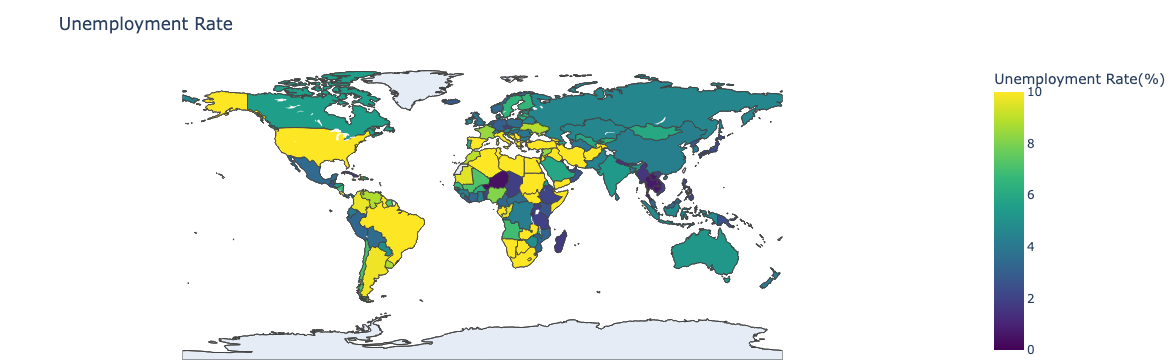

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import pycountry

# --- copy your dataframe ---
df = data.copy()

# --- clean column names (you had trailing spaces earlier) ---
df.columns = df.columns.str.strip()

VALUE_COL = "Unemployment_Rate"
COUNTRY_COL = "Countries and areas"

# Treat 0 as missing
df[VALUE_COL] = df[VALUE_COL].replace(0, np.nan)

# Fix country naming inconsistencies

FIXES = {
    "The Bahamas": "Bahamas",
    "The Gambia": "Gambia",
    "Republic of the Congo": "Congo",
    "Democratic Republic of the Congo": "Congo, The Democratic Republic of the",
    "Ivory Coast": "Côte d'Ivoire",
    "Republic of Ireland": "Ireland",
    "East Timor": "Timor-Leste",
    "Federated States of Micronesia": "Micronesia, Federated States of",
    "Russia": "Russian Federation",
    "Iran": "Iran, Islamic Republic of",
    "Laos": "Lao People's Democratic Republic",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Vatican City": "Holy See (Vatican City State)",
    "Cape Verde": "Cabo Verde",
    "Palestinian National Authority": "Palestine, State of",
    "Moldova": "Moldova, Republic of",
    "Syria": "Syrian Arab Republic",
    "Tanzania": "Tanzania, United Republic of",
    "Venezuela": "Venezuela, Bolivarian Republic of",
    "Bolivia": "Bolivia, Plurinational State of",
    "Vietnam": "Viet Nam",
    "Guinea0Bissau": "Guinea-Bissau",
    "SÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩÔø": "São Tomé and Príncipe",
    "Turkey": "Türkiye"
}

def to_iso3(name):
    if pd.isna(name):
        return None
    
    name = str(name).strip()
    name = FIXES.get(name, name)

    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        try:
            return pycountry.countries.search_fuzzy(name)[0].alpha_3
        except:
            return None

df["iso3"] = df[COUNTRY_COL].apply(to_iso3)

# Drop missing values

plot_df = df.dropna(subset=["iso3", VALUE_COL]).copy()

print(f"Countries plotted: {len(plot_df)}")
print(f"Countries excluded (missing data): {df[VALUE_COL].isna().sum()}")

# Global Heat Map

fig = px.choropleth(
    plot_df,
    locations="iso3",
    color=VALUE_COL,
    hover_name=COUNTRY_COL,
    color_continuous_scale="Viridis",
    range_color=(0, 10),  # better contrast for completion rates
    title="Unemployment Rate"
)

fig.update_geos(
    showcoastlines=True,
    showcountries=True,
    showframe=False
)

fig.update_layout(
    margin=dict(l=0, r=0, t=60, b=0),
    coloraxis_colorbar=dict(title="Unemployment Rate(%)")
)

fig.show()

Countries plotted: 105
Countries excluded (missing data): 95


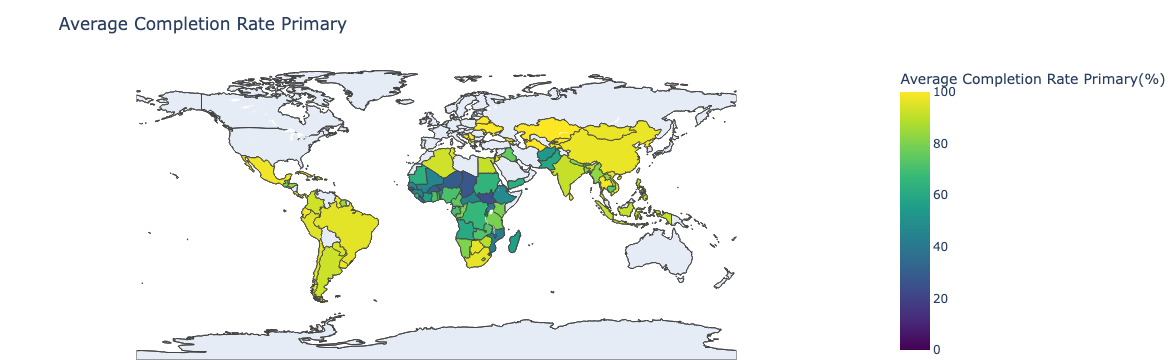

In [21]:
data['Completion_Rate_Primary_Avg'] = (data['Completion_Rate_Primary_Male'] + data['Completion_Rate_Primary_Female']) / 2

VALUE_COL = "Completion_Rate_Primary_Avg"
COUNTRY_COL = "Countries and areas"

# Treat 0 as missing
df[VALUE_COL] = df[VALUE_COL].replace(0, np.nan)

# Fix country naming inconsistencies

FIXES = {
    "The Bahamas": "Bahamas",
    "The Gambia": "Gambia",
    "Republic of the Congo": "Congo",
    "Democratic Republic of the Congo": "Congo, The Democratic Republic of the",
    "Ivory Coast": "Côte d'Ivoire",
    "Republic of Ireland": "Ireland",
    "East Timor": "Timor-Leste",
    "Federated States of Micronesia": "Micronesia, Federated States of",
    "Russia": "Russian Federation",
    "Iran": "Iran, Islamic Republic of",
    "Laos": "Lao People's Democratic Republic",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Vatican City": "Holy See (Vatican City State)",
    "Cape Verde": "Cabo Verde",
    "Palestinian National Authority": "Palestine, State of",
    "Moldova": "Moldova, Republic of",
    "Syria": "Syrian Arab Republic",
    "Tanzania": "Tanzania, United Republic of",
    "Venezuela": "Venezuela, Bolivarian Republic of",
    "Bolivia": "Bolivia, Plurinational State of",
    "Vietnam": "Viet Nam",
    "Guinea0Bissau": "Guinea-Bissau",
    "SÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩÔøΩÔø": "São Tomé and Príncipe",
}

def to_iso3(name):
    if pd.isna(name):
        return None
    
    name = str(name).strip()
    name = FIXES.get(name, name)

    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        try:
            return pycountry.countries.search_fuzzy(name)[0].alpha_3
        except:
            return None

df["iso3"] = df[COUNTRY_COL].apply(to_iso3)

# Drop missing values

plot_df = df.dropna(subset=["iso3", VALUE_COL]).copy()

print(f"Countries plotted: {len(plot_df)}")
print(f"Countries excluded (missing data): {df[VALUE_COL].isna().sum()}")

# Global Heat Map

fig = px.choropleth(
    plot_df,
    locations="iso3",
    color=VALUE_COL,
    hover_name=COUNTRY_COL,
    color_continuous_scale="Viridis",
    range_color=(0, 100), 
    title="Average Completion Rate Primary"
)

fig.update_geos(
    showcoastlines=True,
    showcountries=True,
    showframe=False
)

fig.update_layout(
    margin=dict(l=0, r=0, t=60, b=0),
    coloraxis_colorbar=dict(title="Average Completion Rate Primary(%)")
)

fig.show()

The global heatmap of primary completion rates effectively reveals stark geographic disparities in educational attainment. Sub-Saharan Africa and parts of South/Central Asia show notably lower completion rates (darker purple/blue), while most of East Asia and North and South America display near-universal completion (yellow/green). This visualization immediately highlights regions requiring targeted policy intervention and resource allocation, making it a valuable tool for identifying where educational development efforts should be prioritized.

Note that there are several countries with missing completion rate (Primary), so these countries will appear with no colors on the map.

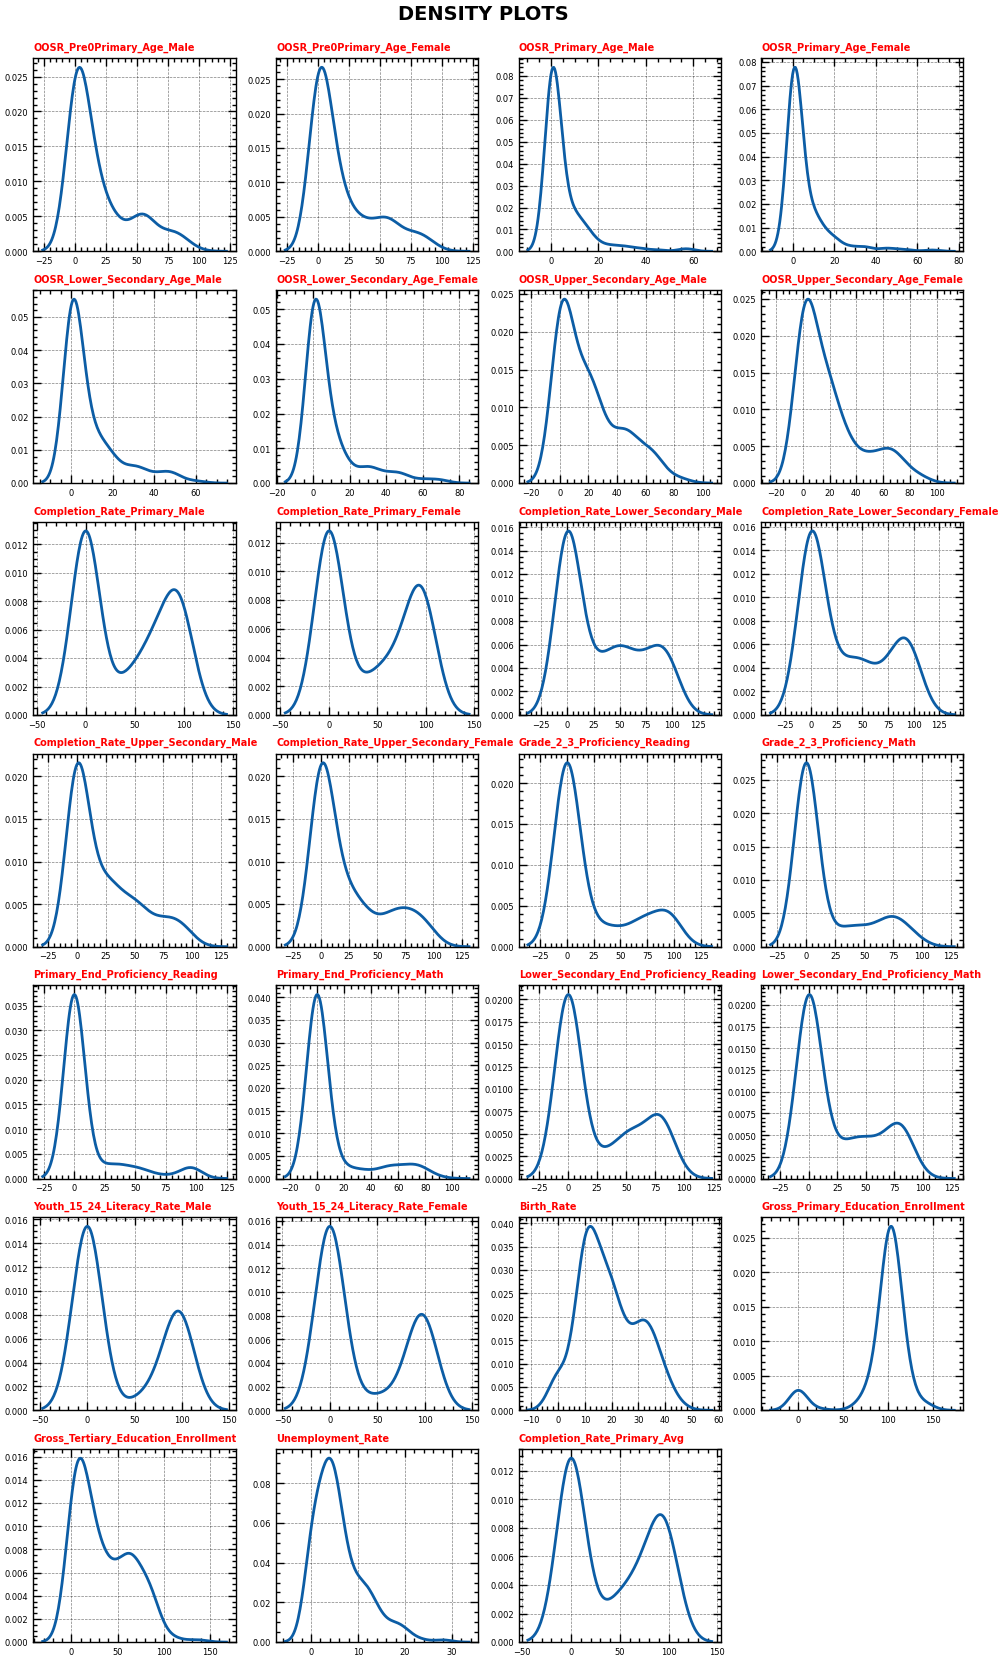

In [8]:
# density plots for all the attributes
cols = [c for c in data.columns if c not in ['Latitude ', 'Longitude', 'Countries and areas']]
cols

fig = plt.figure(figsize=(12, 18), dpi=100)
gs = gridspec.GridSpec(7, 4, figure=fig)
gs.update(wspace=0.2, hspace=0.2)

for idx, col in enumerate(cols):
    ax = fig.add_subplot(gs[idx // 4, idx % 4])
    sns.kdeplot(x=col, data=data, ax=ax)
    ax.set_title(col, fontsize=7, color='red', fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='both', labelsize=6)

fig.suptitle('DENSITY PLOTS', fontsize=14, fontweight='bold', y=1.02)
fig.subplots_adjust(top=0.99)
plt.show()    

plt.show()

The density plots show that many education indicators have bimodal distributions, suggesting two distinct groups in the data. This pattern appears across completion rates, proficiency scores, and enrollment metrics, likely reflecting differences between developed and developing regions. Further analysis is needed to understand what drives these distributional patterns and inform targeted interventions.

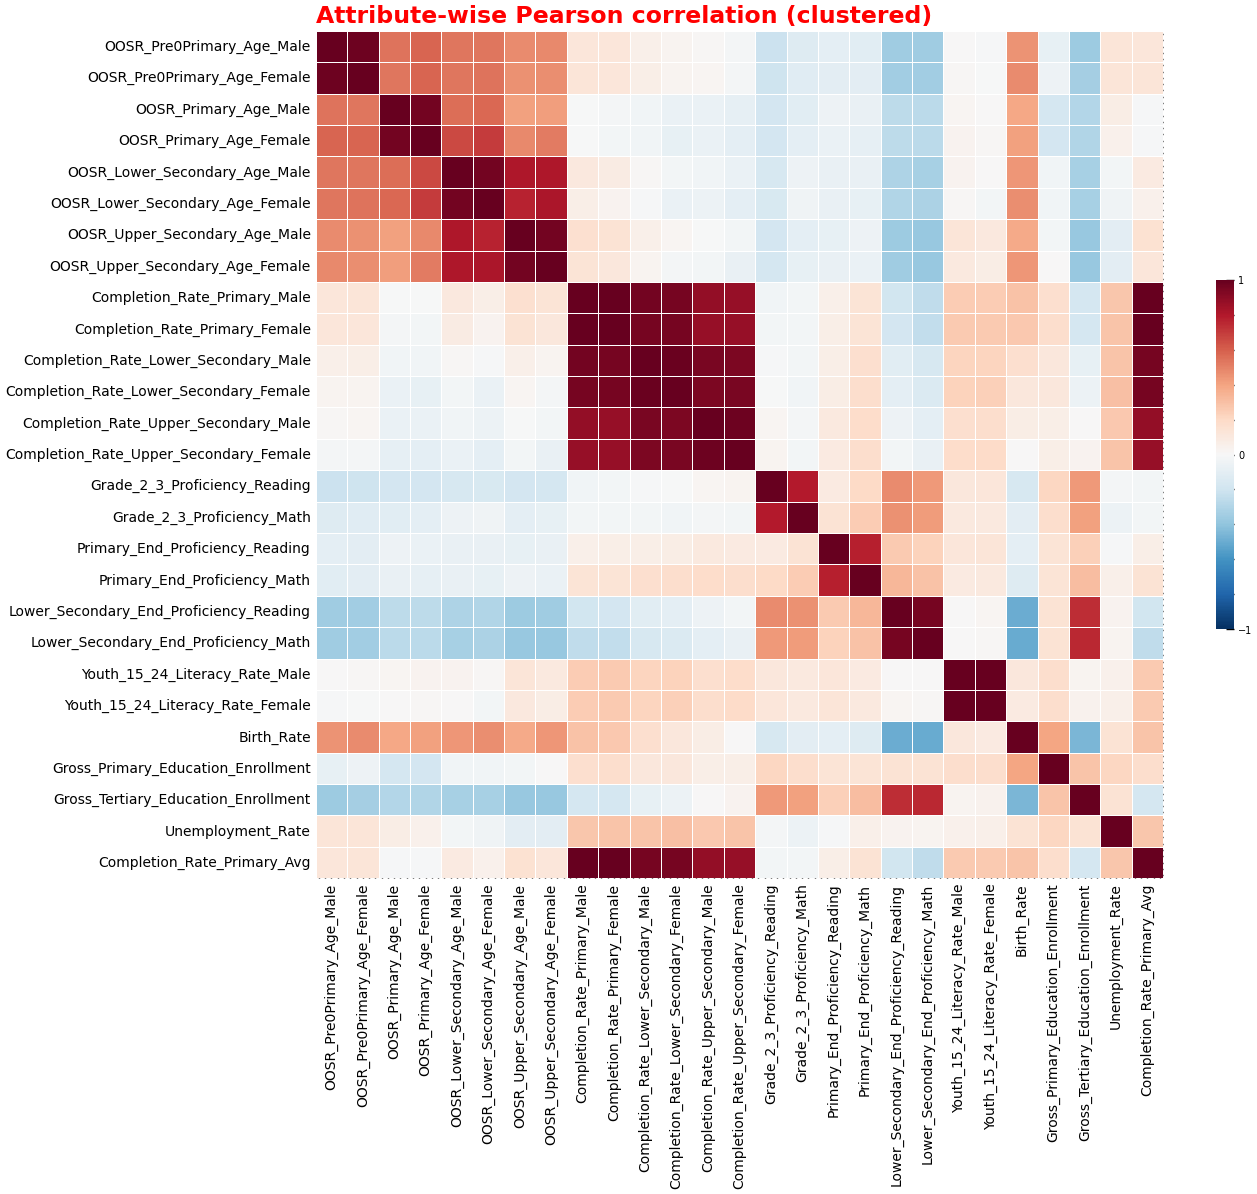

In [9]:
# attributes heatmap
cols = [c for c in data.columns if c not in ['Latitude ', 'Longitude', 'Countries and areas']]
corr = data[cols].corr()

fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(
    corr,
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'shrink': 0.3, 'aspect': 20, 'ticks': [-1, 0, 1]},
    ax=ax,
)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=7)

ax.set_title('Attribute-wise Pearson correlation (clustered)', fontsize=17, color='red', fontweight='bold', loc='left')
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()

The correlation heatmap reveals strong linear relationships among education indicators, with distinct clustering patterns. Completion rates across education levels show high positive correlations with each other, while out-of-school rates cluster separately and exhibit negative correlations with completion metrics.

/Users/sapolraadnui/miniforge3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/Users/sapolraadnui/miniforge3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



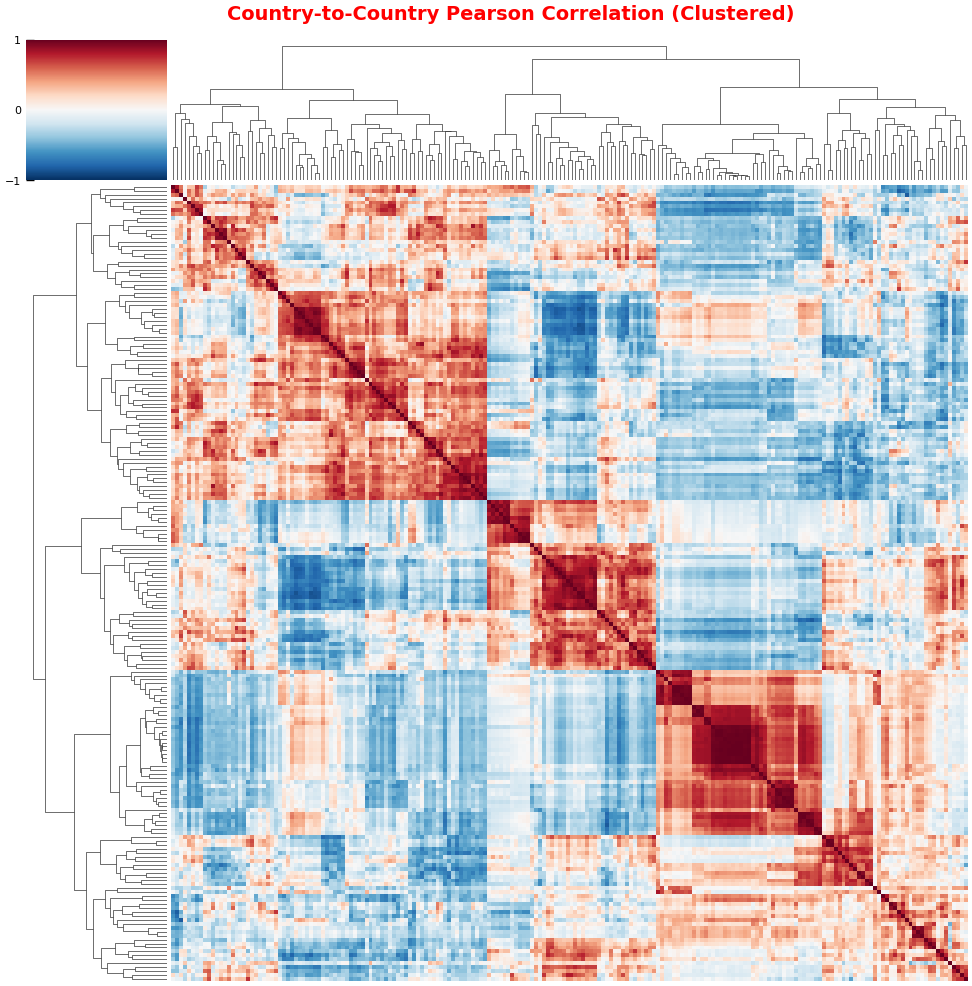

In [10]:
# country-by-country correlation matrix

# Prepare and scale data
data_cluster = data.drop(columns=['Latitude ', 'Longitude']).set_index('Countries and areas')
data_scaled = pd.DataFrame(
    StandardScaler().fit_transform(data_cluster),
    index=data_cluster.index,
    columns=data_cluster.columns
)
corr_matrix = data_scaled.T.corr()  # correlation between countries across indicators


g = sns.clustermap(
    corr_matrix,
    cmap='RdBu_r',
    center=0,
    vmin=-1, vmax=1,
    figsize=(10, 10),
    row_cluster=True,
    col_cluster=True,
    dendrogram_ratio=(0.15, 0.15),
    cbar_pos=(0.02, 0.8, 0.02, 0.12),
    cbar_kws={'ticks': [-1, 0, 1]},
    xticklabels=False,
    yticklabels=False,
)


g.cax.yaxis.set_ticks_position('left')
g.cax.tick_params(labelsize=8)
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
g.fig.subplots_adjust(wspace=0.01, hspace=0.01)

plt.suptitle('Country-to-Country Pearson Correlation (Clustered)',
             fontsize=14, color='red', fontweight='bold', y=1.02, x=0.5)
plt.show()

The country-to-country correlation heatmap reveals three distinct clusters with strong within-cluster similarities and between-cluster differences. The red blocks along the diagonal indicate countries with highly correlated education profiles, while blue regions show negative correlations between clusters. These patterns suggest that countries group into distinct development or policy regimes, requiring further analysis to understand the characteristics defining each cluster.